In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('framingham.csv')

In [3]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### Part 1: Quick Data Check

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df=df.drop('education',axis=1)
df

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### Part 2: Exploratory Data Analysis

In [8]:
df['TenYearCHD'].replace({0:'no',1:'yes'}).value_counts().index

Index(['no', 'yes'], dtype='object', name='TenYearCHD')

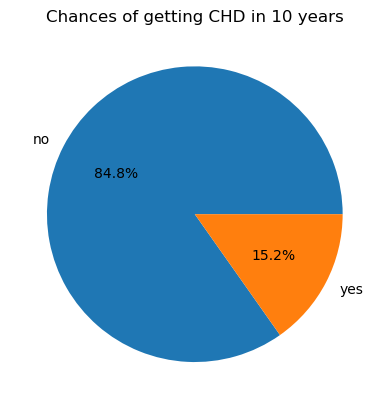

In [9]:
plt.pie(df['TenYearCHD'].value_counts().values, labels=df['TenYearCHD'].replace({0:'no',1:'yes'}).value_counts().index,
       autopct='%1.1f%%')
plt.title('Chances of getting CHD in 10 years');

In [10]:
features = list(df.select_dtypes(include=np.number).columns)
features

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

C:\Users\edsbi\AppData\Local\Temp\ipykernel_36452\2854754210.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,index+1)


<function matplotlib.pyplot.show(close=None, block=None)>

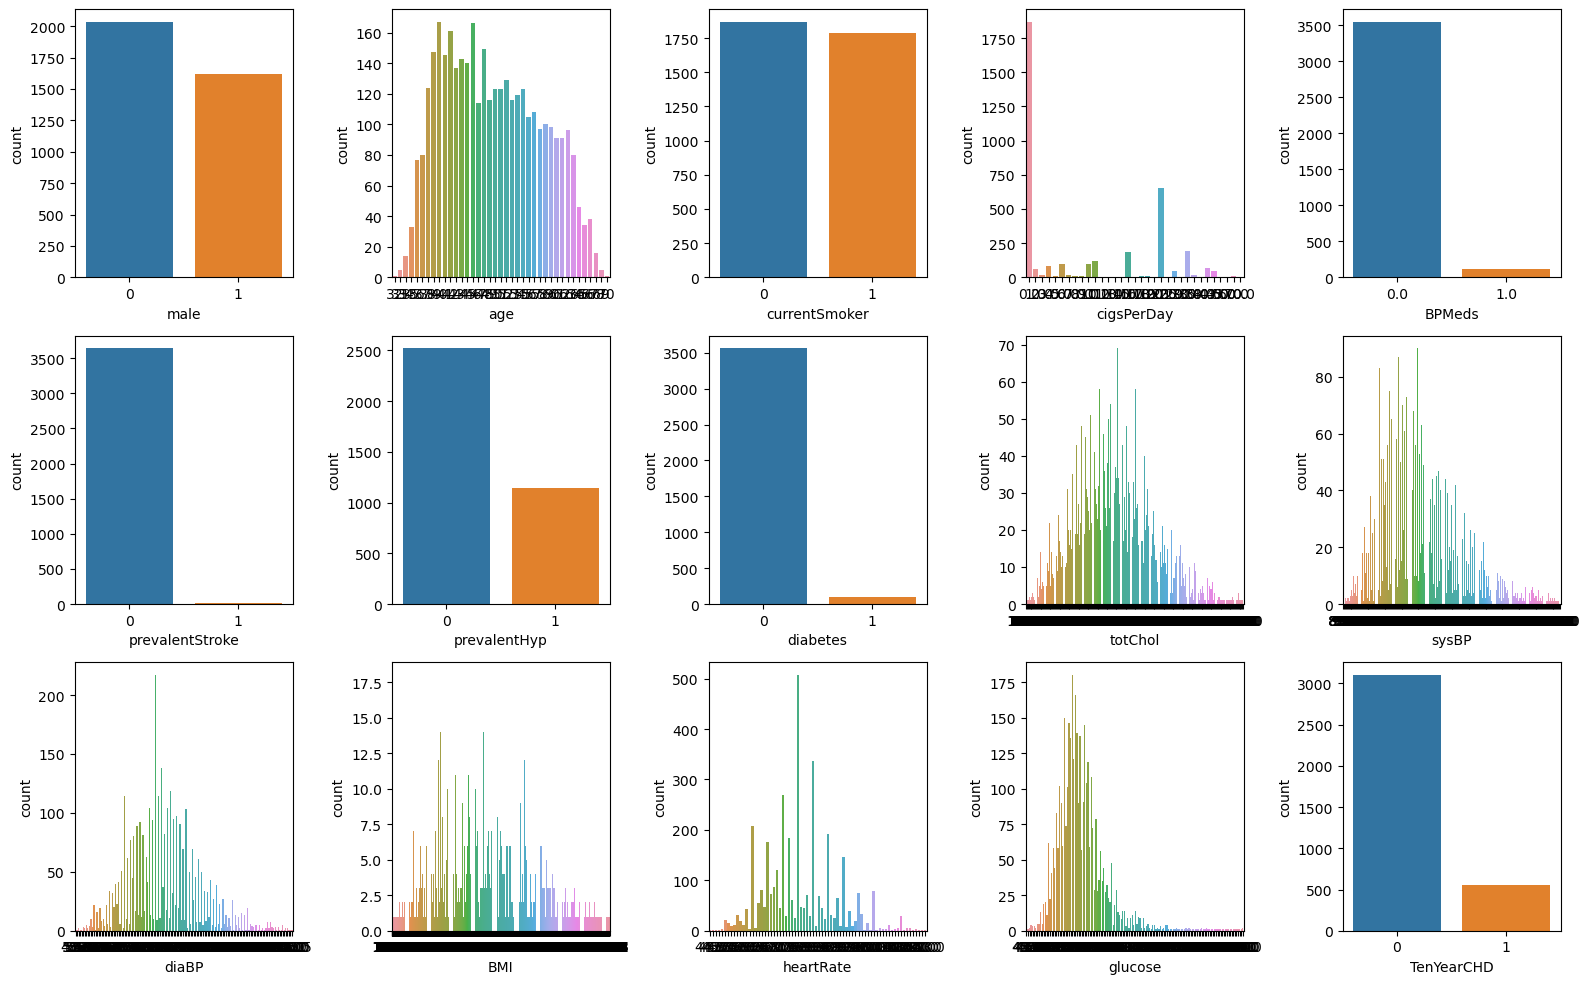

In [11]:
#Distplot
plt.subplots(figsize=(16,10))

for index, col in enumerate(features):
    
    y=df[col].value_counts()
    plt.subplot(3,5,index+1)
    sns.barplot(x=y.index,y=y)
    
plt.tight_layout()
plt.show

In [12]:
#pd.DataFrame(df.cigsPerDay.unique(),columns=['cigsPerDay']).sort_values('cigsPerDay',ascending=False)

In [13]:
df2=df.copy()

In [14]:
df2['age_group']=pd.cut(df['age'],bins=[30,40,50,60,70,80],labels=['30-40','41-50','51-60','61-70','71-80'])

In [15]:
np.sort(df2.cigsPerDay.unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 23., 25., 29., 30., 35.,
       38., 40., 43., 45., 50., 60., 70.])

In [16]:
np.sort(df2.BMI.unique())

array([15.54, 15.96, 16.48, ..., 45.8 , 51.28, 56.8 ])

In [17]:
df2['glucose_group']=pd.cut(df['glucose'],bins=[40,80,115,180,230,400],labels=['Low','Excellent','Good','Adequate','Bad'])

In [18]:
df2['totChol_group']=pd.cut(df['totChol'],bins=[100,200,400,605],labels=['Excellent','Caution','Bad'])

In [19]:
df2['BMI_group']=pd.cut(df['BMI'],bins=[15,18.5,25,30,40,60],labels=['Underweight','Normal','Overweight','Obese','Severe Obese'])

In [20]:
def blood_pressure(sysBP,diaBP):
    for df in df2:
        if sysBP <= 120 and diaBP<=80:
            return 'Healthy'
        elif 120<sysBP<140 and 70<=diaBP<=90:
            return 'Pre-Hypertension'
        elif 140<sysBP<160 and 70<=diaBP<=90:
            return 'Stage 1 Hypertension'
        elif 160<sysBP<180 and diaBP>=75:
            return 'Stage 2 Hypertension'
        else:
            return 'Hypertensional Crisis'

In [21]:
df2['BloodPress_Level']=df2.apply(lambda row: blood_pressure(row['sysBP'],row['diaBP']),axis=1)

In [22]:
#df2.drop('sysBP_group',axis=1, inplace=True)
#df2

In [23]:
blood_press_df=df2[df2['BloodPress_Level']=='Hypertensional Crisis'][['sysBP','diaBP','BloodPress_Level']]

In [24]:
#blood_press_df[blood_press_df['diaBP']<=95].head(60)

In [25]:
np.sort(df2.cigsPerDay.unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 23., 25., 29., 30., 35.,
       38., 40., 43., 45., 50., 60., 70.])

In [26]:
df2['heartRate_group']=pd.cut(df['heartRate'], bins=[40,65,74,143],labels=['Good','Average','Poor'])

In [27]:
df2['cigsPerDay_group']=pd.cut(df['cigsPerDay'],bins=[-1,0.9,2,70],labels=['Good','Average','Poor'])

In [28]:
df2

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,...,heartRate,glucose,TenYearCHD,age_group,glucose_group,totChol_group,BMI_group,BloodPress_Level,heartRate_group,cigsPerDay_group
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,...,80.0,77.0,0,30-40,Low,Excellent,Overweight,Healthy,Poor,Good
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,...,95.0,76.0,0,41-50,Low,Caution,Overweight,Pre-Hypertension,Poor,Good
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,...,75.0,70.0,0,41-50,Low,Caution,Overweight,Pre-Hypertension,Poor,Poor
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,...,65.0,103.0,1,61-70,Excellent,Caution,Overweight,Hypertensional Crisis,Good,Poor
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,...,85.0,85.0,0,41-50,Excellent,Caution,Normal,Pre-Hypertension,Poor,Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,...,66.0,86.0,1,41-50,Excellent,Caution,Overweight,Stage 2 Hypertension,Average,Average
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,...,65.0,68.0,0,51-60,Low,Caution,Normal,Pre-Hypertension,Good,Poor
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,...,80.0,107.0,0,51-60,Excellent,Caution,Normal,Pre-Hypertension,Poor,Good
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,...,67.0,72.0,0,30-40,Low,Excellent,Overweight,Hypertensional Crisis,Average,Good


In [29]:
df2.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'age_group',
       'glucose_group', 'totChol_group', 'BMI_group', 'BloodPress_Level',
       'heartRate_group', 'cigsPerDay_group'],
      dtype='object')

In [30]:
features2=['male', 'currentSmoker', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes','TenYearCHD', 'age_group',
       'glucose_group', 'totChol_group', 'BMI_group', 'BloodPress_Level',
       'heartRate_group', 'cigsPerDay_group']

C:\Users\edsbi\AppData\Local\Temp\ipykernel_36452\3626456347.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,5,index+1)


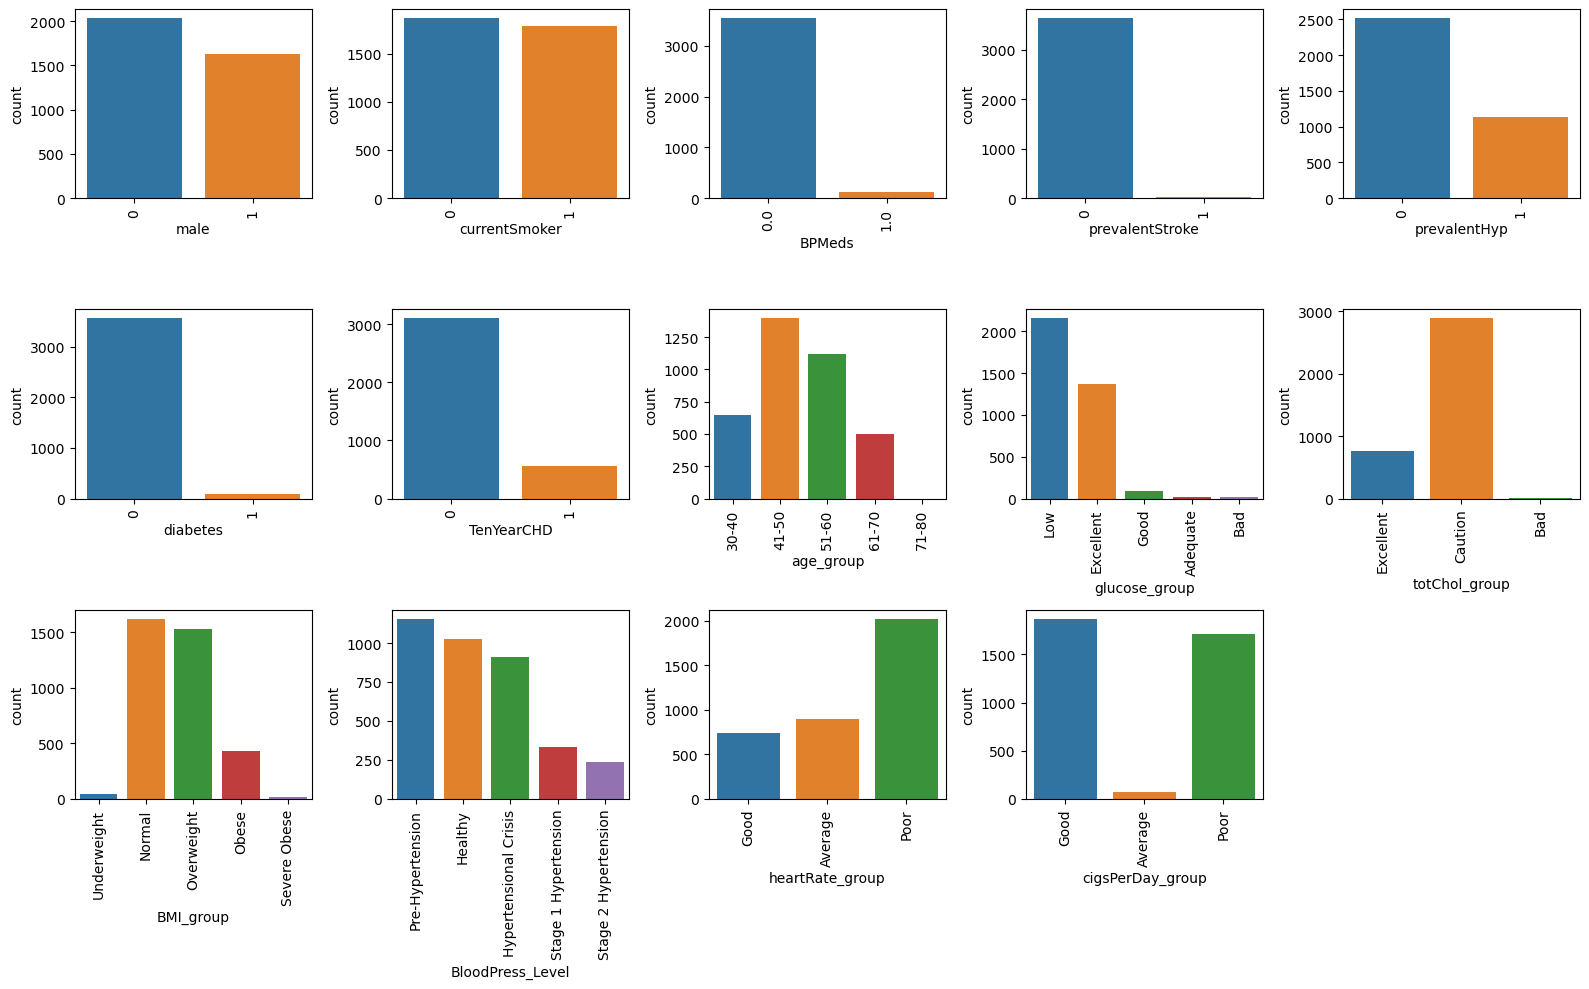

In [31]:
plt.subplots(figsize=(16,10))

for index, col in enumerate(features2):
    y=df2[col].value_counts()
    plt.subplot(3,5,index+1)
    sns.barplot(x=y.index,y=y)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Correlation Map

<Axes: >

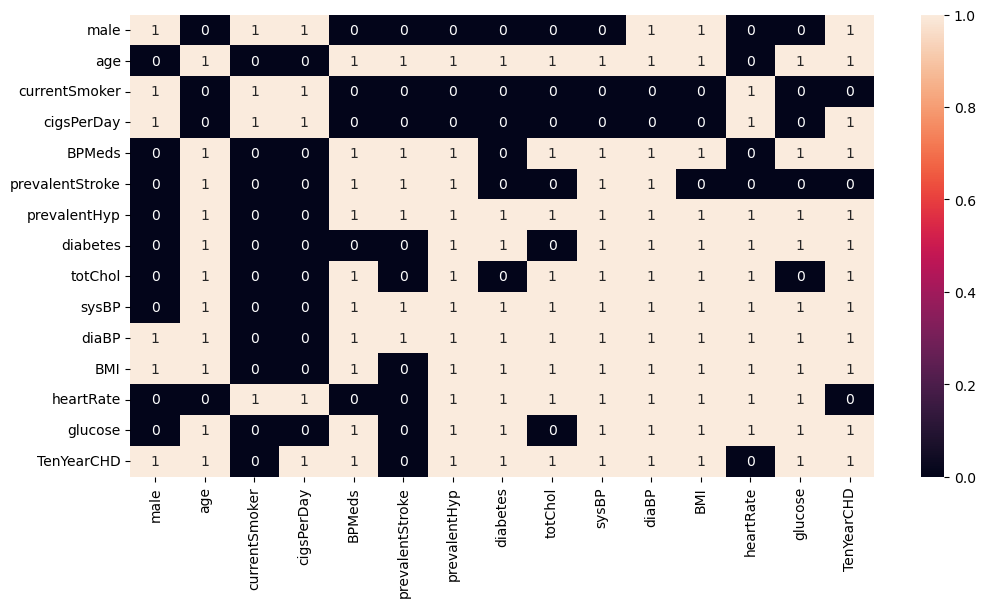

In [32]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr()>=0.05,annot=True)

In [33]:
corr_df=df.corr()['TenYearCHD'].sort_values(ascending=False).iloc[1:]

In [34]:
corr_df=corr_df.reset_index()
corr_df

,index,TenYearCHD
0,age,0.233983
1,sysBP,0.222821
2,prevalentHyp,0.181387
3,diaBP,0.150124
4,glucose,0.121990
5,diabetes,0.093431
6,male,0.091688
7,totChol,0.091338
8,BPMeds,0.089152
9,BMI,0.082055


In [35]:
corr_df=corr_df.rename(columns={'index':'Features','TenYearCHD':'corr_TenYearCHD'})
corr_df

,Features,corr_TenYearCHD
0,age,0.233983
1,sysBP,0.222821
2,prevalentHyp,0.181387
3,diaBP,0.150124
4,glucose,0.121990
5,diabetes,0.093431
6,male,0.091688
7,totChol,0.091338
8,BPMeds,0.089152
9,BMI,0.082055


Text(0.5, 1.0, 'Feature Correlation to Ten Year CHD')

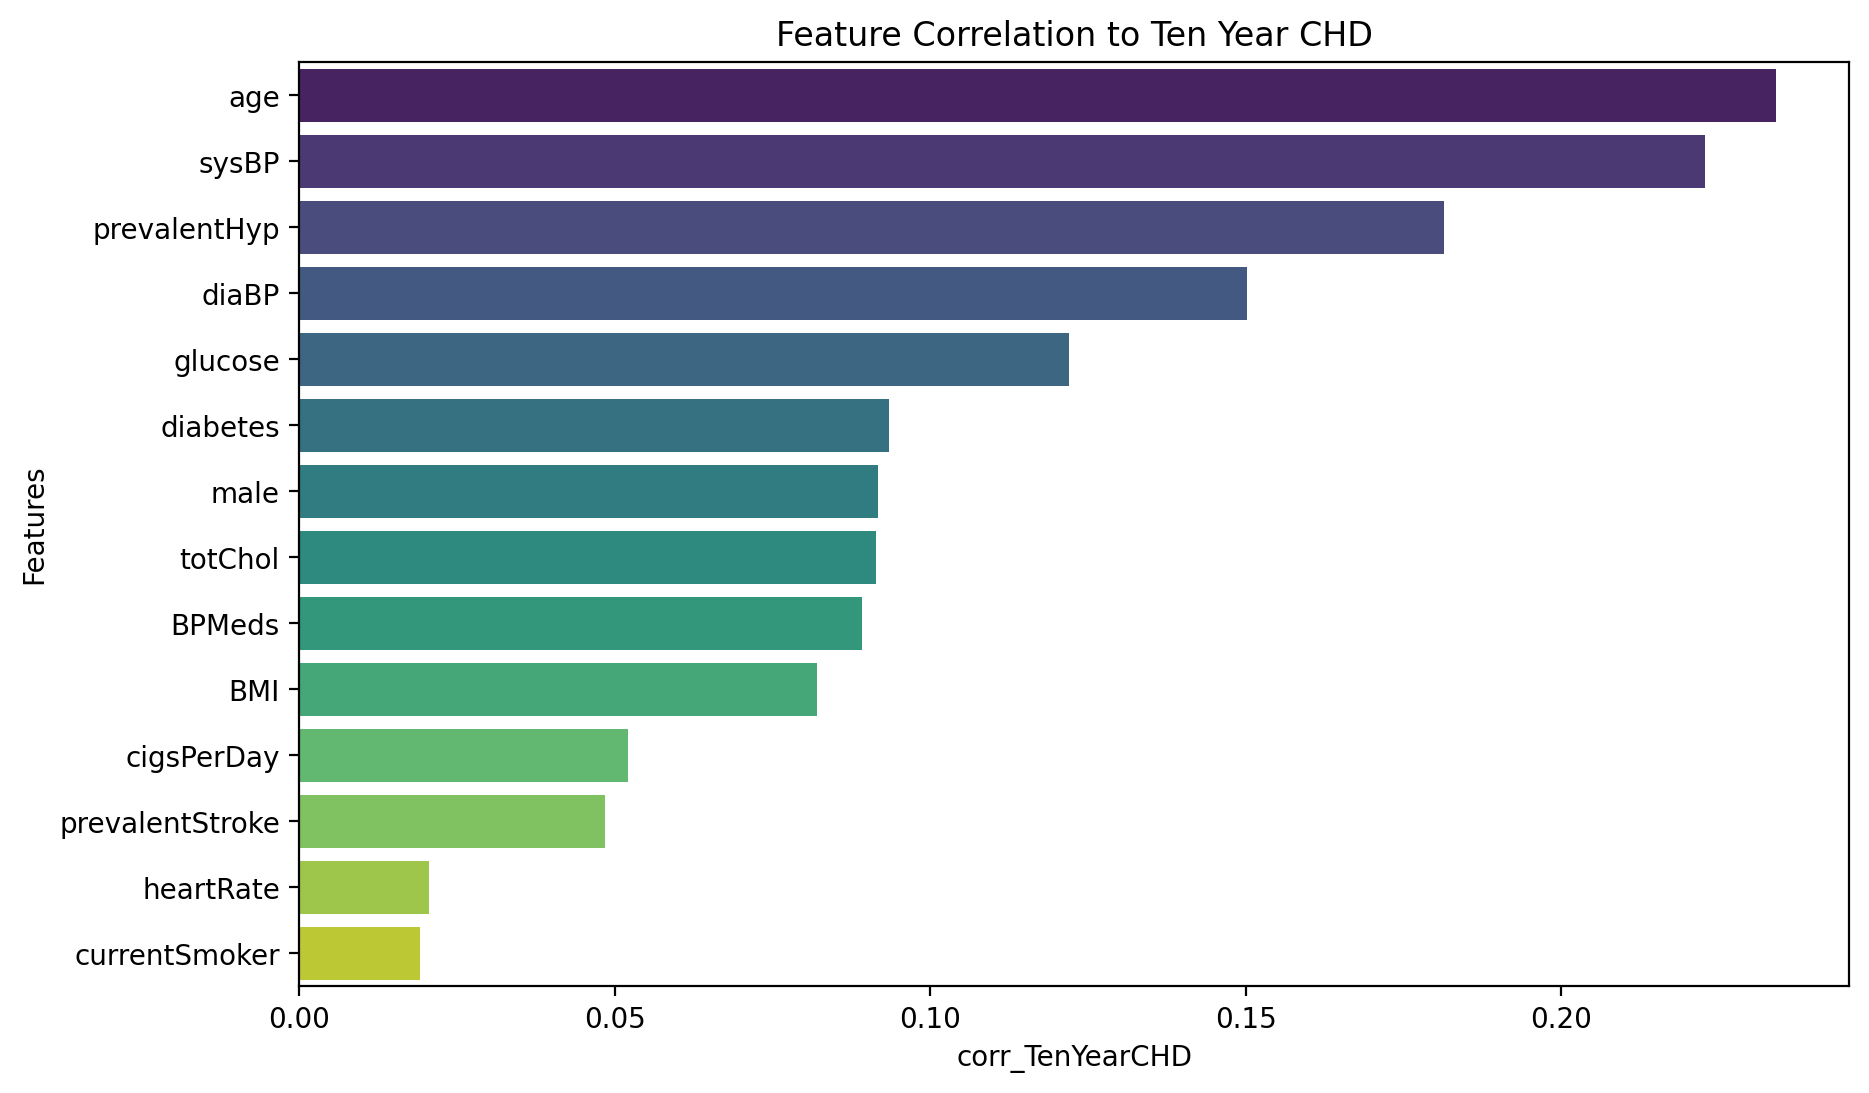

In [36]:
plt.figure(figsize=(10,6),dpi=200)
sns.barplot(data=corr_df,x='corr_TenYearCHD',y='Features',palette='viridis')
plt.title('Feature Correlation to Ten Year CHD')

In [37]:
#we dont need prevalentHyp as we have sysBP and diaBP
df=df.drop(['prevalentHyp','BPMeds','age'],axis=1)
df

,male,currentSmoker,cigsPerDay,prevalentStroke,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,0,0.0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,0,0.0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,1,20.0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,1,30.0,0,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,1,23.0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,1,1.0,0,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,1,43.0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,0,0.0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,0,0.0,0,0,185.0,141.0,98.0,25.60,67.0,72.0,0


### Machine Learning Analysis

In [38]:
X=df.drop('TenYearCHD',axis=1)


In [39]:
y=df['TenYearCHD']

In [40]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [41]:
scaler = StandardScaler()
scale_X_train = scaler.fit_transform(X_train)
scale_X_test=scaler.transform(X_test)

In [42]:
#calculate accuracy score for multiple models
rfc=RandomForestClassifier(n_estimators=50, min_samples_split=8, random_state=1)
log=LogisticRegression(max_iter=5000)

for models in (rfc, log):
    models.fit(scale_X_train,y_train)
    preds=models.predict(scale_X_test)
    print('accuracy score: ',models.__class__.__name__,'=',metrics.accuracy_score(preds,y_test))

accuracy score:  RandomForestClassifier = 0.8287795992714025
accuracy score:  LogisticRegression = 0.8324225865209471


In [43]:
#try with RFC
model=RandomForestClassifier()
model.fit(scale_X_train,y_train)

def heart_disease_check(feature_series):
    features=feature_series.values.reshape(1,-1)
    preds=model.predict(features)
    accuracy_score=metrics.accuracy_score(y_test,model.predict(scale_X_test))
    
    return preds[0],accuracy_score
    

In [44]:
if __name__=='__main__':
        features=pd.Series({
            'sysBP':200,
            'diaBP':100,
            'glucose':300,
            'diabetes':0,
            'male':1,
            'totChol':400,
            'BMI':30,
            'cigsPerDay':2,
            'prevalentStroke':0,
            'heartRate':70,
            'currentSmoker':0
            
        })
        heart_disease, accuracy_score= heart_disease_check(features)
        print(f'Will get chronic heart disease (1: yes, 0: no): {heart_disease}')
        print(f'accuracy_score:  {np.round(accuracy_score,2)*100}%')
    

Will get chronic heart disease (1: yes, 0: no): 0
accuracy_score:  82.0%


In [45]:
#result is inaccurate due to overfitting
from sklearn.model_selection import cross_val_score, GridSearchCV

In [46]:
cv_rfc=cross_val_score(rfc, scale_X_train, y_train, cv=10)
cv_log=cross_val_score(log,scale_X_train, y_train, cv=10)

In [47]:
cv_rfc.mean()

0.8462524634374027

In [48]:
cv_log.mean()

0.8507561456280468

In [49]:
#hyperparameter tuning for rfc
param_grid_rfc={
    'n_estimators':[20,50,100,200],
    'max_depth':[1,5,10,20,30],
    'min_samples_split':[2,3,5,10],
    'min_samples_leaf':[1,2,4,5],
}

In [50]:
grid_search=GridSearchCV(estimator=rfc,param_grid=param_grid_rfc,cv=5,verbose=2, error_score='raise')

In [51]:
grid_search.fit(scale_X_train,y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=1, min

[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=20; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END

[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   0.1s
[C

[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=5, min_samples_split=3, n_estimators=20; total time=   0.0s
[

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] 

[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END

[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] 

[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=50; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.2s
[

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time= 

[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=20; total time=   

[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=3, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=3, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=20; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  

[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total tim

[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=10, n_estimators=20; total tim

[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=4, min_samples_split=10, n_estimators=20; total tim

[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=20; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=5, min_samples_split=10, n_estimators=50; total tim

GridSearchCV(cv=5, error_score='raise',
             estimator=RandomForestClassifier(min_samples_split=8,
                                              n_estimators=50, random_state=1),
             param_grid={'max_depth': [1, 5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4, 5],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [20, 50, 100, 200]},
             verbose=2)

In [52]:
best_rfc=grid_search.best_estimator_

In [53]:
best_rfc

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_estimators=50,
                       random_state=1)

In [54]:
y_pred=best_rfc.predict(scale_X_test)

In [55]:
accuracy=metrics.accuracy_score(y_pred,y_test)
accuracy

0.8269581056466302

In [56]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       456
           1       0.33      0.02      0.04        93

    accuracy                           0.83       549
   macro avg       0.58      0.51      0.47       549
weighted avg       0.75      0.83      0.76       549



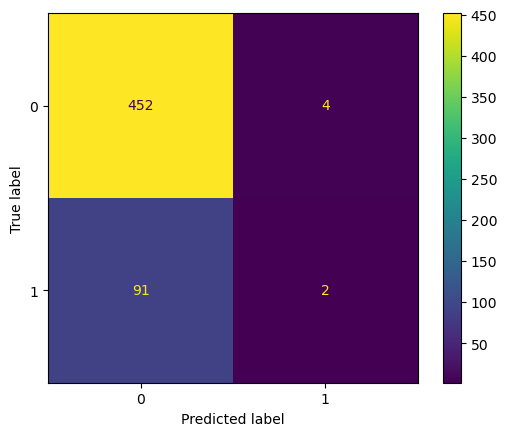

In [58]:
ConfusionMatrixDisplay.from_estimator(best_rfc,scale_X_test,y_test)

In [59]:
def heart_disease(sysBP,diaBP,glucose,diabetes,male,totChol,BMI,cigsPerDay,prevalentStroke,heartRate,currentSmoker):
    features=np.array([[sysBP,diaBP,glucose,diabetes,male,totChol,BMI,cigsPerDay,prevalentStroke,heartRate,currentSmoker]])
    preds=best_rfc.predict(features)
    return preds

In [60]:
if __name__=='__main__':
    sysBP=110
    diaBP=70
    glucose=80
    diabetes=0
    male=1
    totChol=113
    BMI=19
    cigsPerDay=1
    prevalentStroke=0
    heartRate=80
    currentSmoker=1
    
heart_disease=heart_disease(sysBP,diaBP,glucose,diabetes,male,totChol,BMI,cigsPerDay,prevalentStroke,heartRate,currentSmoker)
print(f'heart disease prediction: {heart_disease} (1:yes, 0:no)')

heart disease prediction: [1] (1:yes, 0:no)


In [61]:
#heart_disease=heart_disease(features)

In [62]:
print(f'prediction: {heart_disease} (1:yes,0:no)')

prediction: [1] (1:yes,0:no)
